### Task 1: Clustering Analysis

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import a package and read data
import pandas
import pandas as pd
dat = pd.read_csv('/content/drive/MyDrive/train.csv')
# Print the data frame
dat

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Clustering 1 - KMeans


In [3]:
from sklearn.cluster import KMeans, MeanShift

In [4]:
# Initial the model and define the number of clusters using n_clusters = 3
kmeans = KMeans(n_clusters = 3) 

In [5]:
# Select the data as input to clustering
features = ['Pclass', 'Fare', 'Age', 'Sex']
data = dat[features]
data

,Pclass,Fare,Age,Sex
0,3,7.2500,22.0,male
1,1,71.2833,38.0,female
2,3,7.9250,26.0,female
3,1,53.1000,35.0,female
4,3,8.0500,35.0,male
...,...,...,...,...
886,2,13.0000,27.0,male
887,1,30.0000,19.0,female
888,3,23.4500,NaN,female
889,1,30.0000,26.0,male


In [6]:
# Remove missing value by dropping all rows with missing values
X_dat = data.dropna()
X_dat

,Pclass,Fare,Age,Sex
0,3,7.2500,22.0,male
1,1,71.2833,38.0,female
2,3,7.9250,26.0,female
3,1,53.1000,35.0,female
4,3,8.0500,35.0,male
...,...,...,...,...
885,3,29.1250,39.0,female
886,2,13.0000,27.0,male
887,1,30.0000,19.0,female
889,1,30.0000,26.0,male


In [7]:
# Using one-hot encoding to convert the variables
X_dat = pd.get_dummies(X_dat,columns=['Pclass', 'Sex'],drop_first=True)
X_dat

,Fare,Age,Pclass_2,Pclass_3,Sex_male
0,7.2500,22.0,0,1,1
1,71.2833,38.0,0,0,0
2,7.9250,26.0,0,1,0
3,53.1000,35.0,0,0,0
4,8.0500,35.0,0,1,1
...,...,...,...,...,...
885,29.1250,39.0,0,1,0
886,13.0000,27.0,1,0,1
887,30.0000,19.0,0,0,0
889,30.0000,26.0,0,0,1


In [11]:
# Fit the model

kmeans.fit(X_dat)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
# Get assigned cluster index, and add one additional column to the dataset. 
X_dat['cluster'] = kmeans.predict(X_dat)
print(X_dat)

        Fare   Age  Pclass_2  Pclass_3  Sex_male  cluster
0     7.2500  22.0         0         1         1        0
1    71.2833  38.0         0         0         0        2
2     7.9250  26.0         0         1         0        0
3    53.1000  35.0         0         0         0        2
4     8.0500  35.0         0         1         1        0
..       ...   ...       ...       ...       ...      ...
885  29.1250  39.0         0         1         0        0
886  13.0000  27.0         1         0         1        0
887  30.0000  19.0         0         0         0        0
889  30.0000  26.0         0         0         1        0
890   7.7500  32.0         0         1         1        0

[714 rows x 6 columns]


### Choose the optimal K by comparing within cluster sum squared distance (WCSS)

In [13]:
# Within Cluster Sum of Square
kmeans.inertia_

509310.57678462245

In [14]:
# Set a range of K value, and calculate WCSS
Sum_of_squared_distances = []

K = range(1,20)

for k in K:
    km = KMeans(n_clusters=k)
    
    km = km.fit(X_dat)
    
    Sum_of_squared_distances.append(km.inertia_)

In [15]:
# Calculate WCSS
Sum_of_squared_distances

[2148031.1186038083,
 918216.110103759,
 509310.57678462245,
 315078.76091641927,
 235189.6885192211,
 164354.54646844306,
 126512.92749314777,
 110955.45608766477,
 95986.83910876937,
 85034.6203998532,
 75534.96264905459,
 68095.73463174625,
 61100.18302794262,
 54604.989952010976,
 49612.35603152473,
 45373.68627406182,
 42003.498213631814,
 39217.84584992027,
 36914.11095849791]

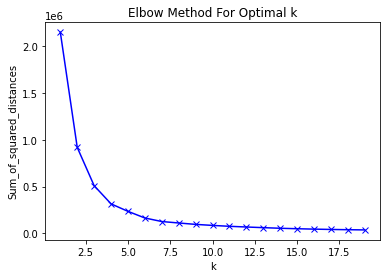

In [16]:
# Plot all values to find the Elbow
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

The best optimal value to choose is 4.




## Clustering 2 - Hierarchical Clustering


In [22]:
# Select the data as input to clustering
features = ['Pclass', 'Fare', 'Age', 'Sex']
data = dat[features]
X_data = data.dropna()
X_data

,Pclass,Fare,Age,Sex
0,3,7.2500,22.0,male
1,1,71.2833,38.0,female
2,3,7.9250,26.0,female
3,1,53.1000,35.0,female
4,3,8.0500,35.0,male
...,...,...,...,...
885,3,29.1250,39.0,female
886,2,13.0000,27.0,male
887,1,30.0000,19.0,female
889,1,30.0000,26.0,male


In [23]:
# Change the categorical variable into dummies
X_dat = pd.get_dummies(X_data, columns=['Pclass', 'Sex'], drop_first=True)
X_dat

,Fare,Age,Pclass_2,Pclass_3,Sex_male
0,7.2500,22.0,0,1,1
1,71.2833,38.0,0,0,0
2,7.9250,26.0,0,1,0
3,53.1000,35.0,0,0,0
4,8.0500,35.0,0,1,1
...,...,...,...,...,...
885,29.1250,39.0,0,1,0
886,13.0000,27.0,1,0,1
887,30.0000,19.0,0,0,0
889,30.0000,26.0,0,0,1


In [24]:
# Import the package and initial the model
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(linkage='ward', n_clusters=3)

In [25]:
# Fit the model
agc.fit(X_dat)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

In [26]:
# Get assigned cluster index, and add one additional column to the dataset. 
X_dat['cluster'] = agc.labels_
X_dat

,Fare,Age,Pclass_2,Pclass_3,Sex_male,cluster
0,7.2500,22.0,0,1,1,2
1,71.2833,38.0,0,0,0,1
2,7.9250,26.0,0,1,0,2
3,53.1000,35.0,0,0,0,1
4,8.0500,35.0,0,1,1,2
...,...,...,...,...,...,...
885,29.1250,39.0,0,1,0,2
886,13.0000,27.0,1,0,1,2
887,30.0000,19.0,0,0,0,2
889,30.0000,26.0,0,0,1,2


### Task 2: Regression Analysis 

In [27]:
# Load package and read data
import statsmodels.api as sm
import pandas as pd


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [33]:
# Select the data as input to clustering
features = ['Pclass', 'Embarked', 'Age', 'Sex', 'Fare']
data = dat[features].dropna()
data

,Pclass,Embarked,Age,Sex,Fare
0,3,S,22.0,male,7.2500
1,1,C,38.0,female,71.2833
2,3,S,26.0,female,7.9250
3,1,S,35.0,female,53.1000
4,3,S,35.0,male,8.0500
...,...,...,...,...,...
885,3,Q,39.0,female,29.1250
886,2,S,27.0,male,13.0000
887,1,S,19.0,female,30.0000
889,1,C,26.0,male,30.0000


In [34]:
# Analyze on a research question "whether a factor affects ticket fare" using factors: pclass, age, sex, embarked.
# Set the independent dataset X_dat
X_dat = data[['Pclass', 'Age', 'Sex', 'Embarked']]
X_dat

,Pclass,Age,Sex,Embarked
0,3,22.0,male,S
1,1,38.0,female,C
2,3,26.0,female,S
3,1,35.0,female,S
4,3,35.0,male,S
...,...,...,...,...
885,3,39.0,female,Q
886,2,27.0,male,S
887,1,19.0,female,S
889,1,26.0,male,C


In [35]:
# Change the categorical variable into dummies
X_data = pd.get_dummies(X_dat, columns=['Pclass', 'Sex', 'Embarked'], drop_first=True)
X_data

,Age,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,22.0,0,1,1,0,1
1,38.0,0,0,0,0,0
2,26.0,0,1,0,0,1
3,35.0,0,0,0,0,1
4,35.0,0,1,1,0,1
...,...,...,...,...,...,...
885,39.0,0,1,0,1,0
886,27.0,1,0,1,0,1
887,19.0,0,0,0,0,1
889,26.0,0,0,1,0,0


In [36]:
# We need to add constant.
X_data = sm.add_constant(X_data)
X_data

,const,Age,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,1.0,22.0,0,1,1,0,1
1,1.0,38.0,0,0,0,0,0
2,1.0,26.0,0,1,0,0,1
3,1.0,35.0,0,0,0,0,1
4,1.0,35.0,0,1,1,0,1
...,...,...,...,...,...,...,...
885,1.0,39.0,0,1,0,1,0
886,1.0,27.0,1,0,1,0,1
887,1.0,19.0,0,0,0,0,1
889,1.0,26.0,0,0,1,0,0


In [37]:
# Set the dependent variable (only one column)
y_dat = data['Fare']
y_dat

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
885    29.1250
886    13.0000
887    30.0000
889    30.0000
890     7.7500
Name: Fare, Length: 712, dtype: float64

In [38]:
# Initial a model using OLS and fit the model. 
mod = sm.OLS(y_dat, X_data)
res = mod.fit()


# Print the summary
print(res.summary()) 

                            OLS Regression Results                            
Dep. Variable:                   Fare   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     76.48
Date:                Sat, 10 Apr 2021   Prob (F-statistic):           1.75e-73
Time:                        03:29:38   Log-Likelihood:                -3657.3
No. Observations:                 712   AIC:                             7329.
Df Residuals:                     705   BIC:                             7361.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        117.7148      5.854     20.107      0.0

 The R-squared for the model: 0.394

 Number of observations used to run the analysis: 712

Base on the result, we can see that:

Variable Age has significantly associated with variable Fare, the relationship is negative. When Age increases one unit, Fare will decrease 0.4246 unit.

Variable Pclass_2 has significantly associated with variable Fare, the relationship is negative. For a 1-unit increase in the Pclass_2, we expect a 65.5417 point decrease in the Fare.

Variable Pclass_3 has significantly associated with variable Fare, the relationship is negative. For a 1-unit increase in the Pclass_3, we expect a 74.8492 point decrease in the Fare.

Variable Sex_male has significantly associated with variable Fare, the relationship is negative. For a 1-unit increase in the Sex_male, we expect a 9.7343 point decrease in the Fare.

Variable Embarked_Q does not have significantly associated with variable Fare. For a 1-unit increase in the Embarked_Q, a 13.1231  point decrease in the Fare.

Variable Embarked_S has significantly associated with variable Fare, the relationship is negative. For a 1-unit increase in the Embarked_S, we expect a 13.6344 point decrease in the Fare.